In [1]:
# Import all needed libraries and sublibraries

In [113]:
import tensorflow as tf
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import keras

In [114]:
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras import regularizers


In [115]:
import numpy as np
import pandas as pd

In [116]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [117]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [118]:
# Import input (x) and output (y) data, and assign these to df1 and df2

df1 = pd.read_csv('X_data.csv')
df2 = pd.read_csv('Y_data.csv')


In [119]:
print(df1)

      17.99  10.38   122.8    1001   0.1184   0.2776    0.3001    0.1471  \
0    20.570  17.77  132.90  1326.0  0.08474  0.07864  0.086900  0.070170   
1    19.690  21.25  130.00  1203.0  0.10960  0.15990  0.197400  0.127900   
2    11.420  20.38   77.58   386.1  0.14250  0.28390  0.241400  0.105200   
3    20.290  14.34  135.10  1297.0  0.10030  0.13280  0.198000  0.104300   
4    12.450  15.70   82.57   477.1  0.12780  0.17000  0.157800  0.080890   
5    18.250  19.98  119.60  1040.0  0.09463  0.10900  0.112700  0.074000   
6    13.710  20.83   90.20   577.9  0.11890  0.16450  0.093660  0.059850   
7    13.000  21.82   87.50   519.8  0.12730  0.19320  0.185900  0.093530   
8    12.460  24.04   83.97   475.9  0.11860  0.23960  0.227300  0.085430   
9    16.020  23.24  102.70   797.8  0.08206  0.06669  0.032990  0.033230   
10   15.780  17.89  103.60   781.0  0.09710  0.12920  0.099540  0.066060   
11   19.170  24.80  132.40  1123.0  0.09740  0.24580  0.206500  0.111800   
12   15.850 

In [120]:
print(df2)

     1
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
10   1
11   1
12   1
13   1
14   1
15   1
16   1
17   1
18   0
19   0
20   0
21   1
22   1
23   1
24   1
25   1
26   1
27   1
28   1
29   1
..  ..
538  0
539  0
540  0
541  0
542  0
543  0
544  0
545  0
546  0
547  0
548  0
549  0
550  0
551  0
552  0
553  0
554  0
555  0
556  0
557  0
558  0
559  0
560  0
561  1
562  1
563  1
564  1
565  1
566  1
567  0

[568 rows x 1 columns]


In [121]:
# Scale input data

# why we train is because some features are order of magnitude higher than others
# and it is unlikely features are more correlated than others to the output
df1 = preprocessing.scale(df1)

In [122]:
print(df1)

[[ 1.83208378 -0.35832707  1.68910604 ...  1.09526221 -0.24044363
   0.28529387]
 [ 1.58210603  0.45385958  1.56958968 ...  1.96646779  1.16385786
   0.2053006 ]
 [-0.76711673  0.25081292 -0.59077158 ...  2.18809026  6.08623563
   4.95045676]
 ...
 [ 0.70434323  2.04789258  0.6752776  ...  0.41969578 -1.10613122
  -0.31576665]
 [ 1.84060575  2.33962629  1.98583632 ...  2.30272257  1.93516598
   2.22846365]
 [-1.80679694  1.22170271 -1.81313547 ... -1.74761915 -0.04354852
  -0.74961903]]


In [123]:
# Split the data into input (x) training and testing data, and output (y) training and testing data
# with training data being 80% of the data and testing data being the remaining 20% of the data

X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size = 0.2)


In [124]:
print('X training data : ', X_train)

X training data :  [[-0.07115594 -0.72241074 -0.13990641 ... -0.89842297 -0.87180977
  -0.70851137]
 [ 1.46279846  1.67213956  1.48304335 ...  0.9806299   1.25986457
   1.57851835]
 [-0.30408976 -1.27553785 -0.37935126 ... -1.20777738 -1.28675401
  -1.00459756]
 ...
 [ 0.22711297 -1.02114606  0.18690902 ...  0.00549102 -0.34133203
  -0.06412117]
 [-1.19776023 -0.29064485 -1.12571033 ... -0.23294419 -0.46174722
   1.79516678]
 [-0.34954026 -0.84143809 -0.32289008 ... -0.19320499 -1.4624951
  -0.70073425]]


In [125]:
print('X testing data : ', X_test)

X testing data :  [[ 1.19009546 -0.16928362  1.09976674 ...  0.6535457   0.50157431
  -0.80572541]
 [-0.31829304  0.34416771 -0.34638123 ... -0.78531909  0.48530199
  -1.08514634]
 [ 2.54792917  0.12245009  2.48038678 ...  1.71274827  0.01665908
  -0.61740793]
 ...
 [-0.17910088  0.6989159  -0.2062586  ...  0.21182919 -0.04354852
  -0.8173911 ]
 [ 0.27824478  0.63356755  0.22029118 ...  0.59088003 -0.36248605
  -0.28632469]
 [ 0.55378845  0.08044043  0.50218494 ...  0.57559572 -0.40316686
  -1.11181076]]


In [126]:
print('Y training data : ', y_train)

Y training data :       1
356  0
32   1
308  0
0    1
358  0
131  1
499  0
479  0
528  0
450  1
402  0
536  0
44   1
172  0
54   0
191  0
567  0
204  1
343  0
476  0
307  0
79   0
69   1
413  1
219  0
97   0
354  0
86   1
526  0
452  0
..  ..
469  0
200  1
25   1
451  0
556  0
407  1
130  1
550  0
268  0
359  0
319  0
246  0
337  0
260  1
6    1
378  1
188  0
169  0
133  1
512  0
64   1
211  1
263  1
330  0
312  0
399  1
460  1
471  0
175  0
283  0

[454 rows x 1 columns]


In [127]:
print('Y testing data : ', y_test)

Y testing data :       1
185  1
149  0
502  1
488  1
382  0
124  0
107  1
83   0
87   0
164  0
222  1
474  0
552  0
20   0
553  0
447  0
410  0
396  0
143  0
494  0
311  0
435  0
159  0
221  0
370  0
85   1
363  0
240  0
126  1
306  0
..  ..
30   1
561  1
477  0
527  0
380  0
181  1
313  0
342  1
362  0
461  0
372  1
135  0
436  0
426  0
272  0
231  0
519  0
57   0
233  0
325  0
255  1
238  1
187  0
542  0
84   1
92   0
498  1
48   0
53   1
74   1

[114 rows x 1 columns]


In [128]:
# Define a "shallow" logistic regression model

model = Sequential()
model.add(Dense(13, input_shape=(30,), activation='relu'))

In [129]:

model.add(Dense(1, activation='sigmoid'))

In [130]:

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [131]:
# Pass several parameters to 'EarlyStopping' function and assign it to 'earlystopper'

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')

#fit model over 2000 iterations with 'earlystopper' callback and assign it to history

history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, callbacks = [earlystopper])

history_dict = history.history



Epoch 00213: early stopping


In [132]:
print(history_dict)

{'val_loss': [0.8146139988000842, 0.637608736321546, 0.515028064665587, 0.4220623011174409, 0.35457981669384503, 0.3009945685448854, 0.2564536428106004, 0.2216743550438812, 0.19381313997766245, 0.17101872831151105, 0.15348632439323093, 0.14030220197594684, 0.12968199106230252, 0.12027869881063268, 0.11094783937585527, 0.10386406338733176, 0.09807878030814986, 0.09258048927438432, 0.08751987136792445, 0.08332057318825653, 0.07937256970267365, 0.0759646618279858, 0.07269808757996214, 0.06972027796766032, 0.06700935187763062, 0.06467038554989774, 0.06236934305533119, 0.06026764624360679, 0.05842949514803679, 0.056598036293534264, 0.05466470910587173, 0.052863996151996696, 0.05127511805166369, 0.04987617603678634, 0.0491103564483532, 0.048027098286842956, 0.04684984786570936, 0.045718935250804046, 0.04462442466098329, 0.043589189648628235, 0.04253138914920282, 0.041532179259735603, 0.040489026817722595, 0.03919065689695054, 0.03824823444196279, 0.03737752271843129, 0.03654933542661045, 0.0

Text(0.5, 0, 'Epochs')

<Figure size 432x288 with 0 Axes>

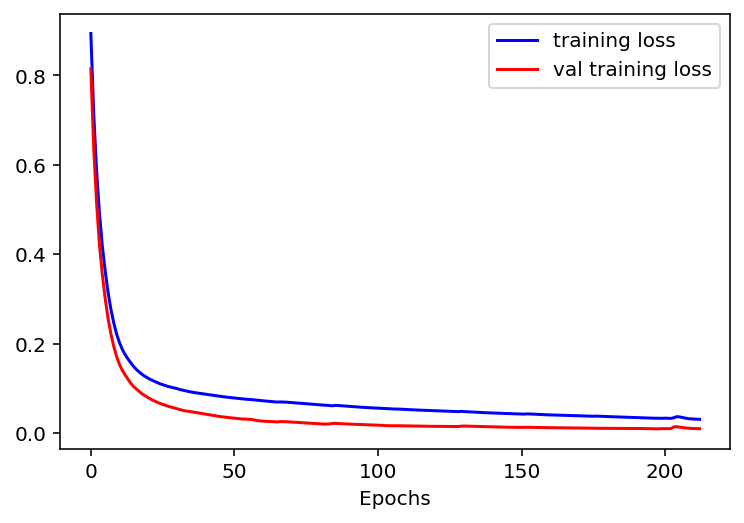

In [133]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values, 'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend()
plt.xlabel('Epochs')

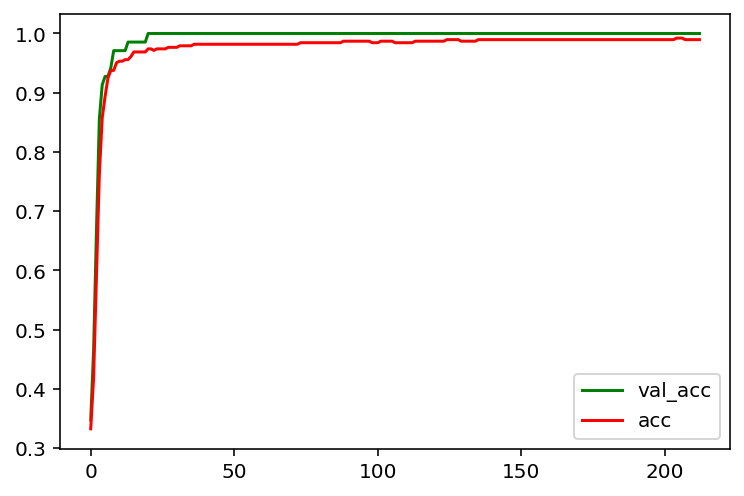

In [134]:
# Plot accuracy over the epochs

accuracy_values = history_dict['acc']
val_accuracy_values = history_dict['val_acc']
plt.plot(val_accuracy_values, '-g', label='val_acc')
plt.plot(accuracy_values, '-r', label='acc')
plt.legend()

In [135]:
# Calculate loss and accuracy of testing data
loss, acc = model.evaluate(X_test, y_test)
print('Test loss : ', loss )
print('Test accuracy : ', acc)

114/114 [==============================] - 0s 2ms/step
Test loss :  0.04389702326111626
Test accuracy :  0.9736842105263158


In [136]:
# AUC score of testing data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_test_pred = model.predict_proba(X_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_test_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Testing data AUC: ', auc_keras)

Testing data AUC:  1.0


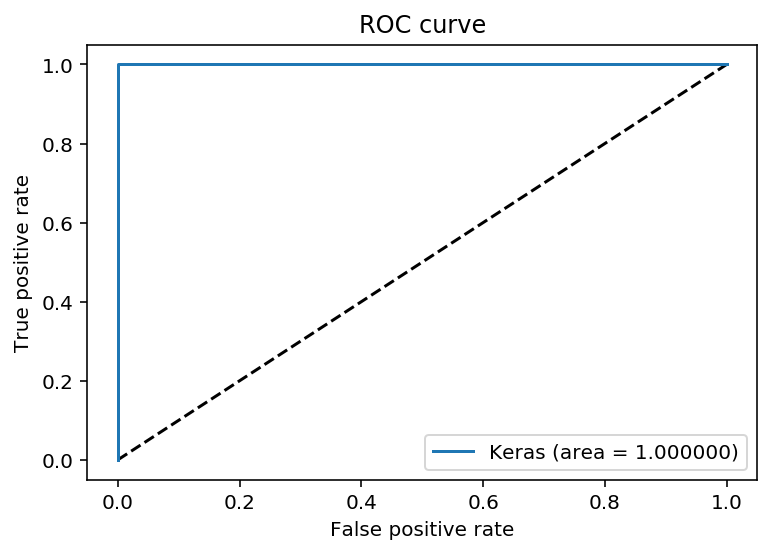

In [137]:
# ROC curve of testing data
plt.figure(1)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:3f})'. format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [138]:
# AUC score of training data

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_train_pred = model.predict_proba(X_train)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, y_train_pred)
auc_keras = auc(fpr_keras, tpr_keras)
print('Training data AUC: ', auc_keras)

Training data AUC:  0.9997947454844006


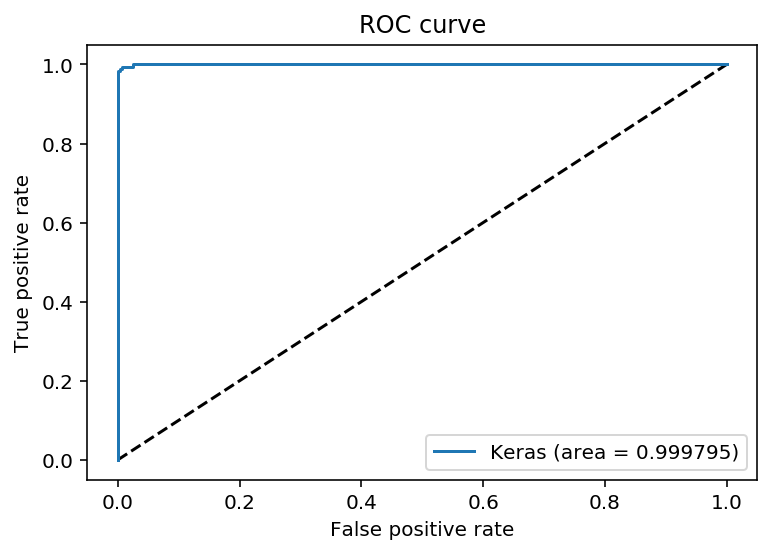

In [139]:
# ROC curve of training data
plt.figure(1)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:3f})'. format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()